# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** I Made Wiratathya Putramas
- **Email:** mdwiratathya@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/mdwiratathya

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap penyewa sepeda?
- Bagaimana perbandingan penyewa sepeda pada saat weekday dan weekend?
- Bagaimana tren penggunaan sepeda dalam sehari untuk tiap musim?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Data Wrangling**

### **1.1 Gathering Data**
Pada dataset ini, terdapat 2 file csv yang harus diimpor, yaitu day.csv dan hr.csv

In [2]:
day_df = pd.read_csv("Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### **1.2 Assessing Data**

#### 1.2.1 Mengecek Tipe Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari sini bisa diketahui ada 1 kolom dengan tipe data yang tidak sesuai, yaitu dteday, yang harusnya bertipe datetime

In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama seperti day_df, ada 1 kolom dengan tipe data yang tidak sesuai, yaitu dteday, yang harusnya bertipe datetime

kedua dataframe tidak memiliki missing value

#### 1.2.2 Mengecek duplicated data

In [6]:
day_df.duplicated().sum()

0

In [7]:
hour_df.duplicated().sum()

0

Kedua dataframe tidak memiliki duplicated value

#### 1.2.3 Mengecek missing value

In [8]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

kedua dataframe tidak memiliki duplicated data

#### 1.2.4 Mengecek Nilai Statistik

In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada keanehan dalam data statistik yang ada, seluruhnya telah sesuai seperti deskripsi yang seharusnya. Akan tetapi, sepertinya dari sini akan lebih mudah apabila nantinya kita mengubah kolom season, yr, mnth, hr, holiday, weekday, workingday, dan weathersit menjadi kategorikal

### **1.3 Cleaning Data**

#### 1.3.1 Mengubah Nilai Beberapa Kolom

beberapa nilai yang tadinya angka akan diubah menjadi yang seharusnya untuk mempermudah exploratory dan pengolahan data

In [12]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df["season"] = day_df["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
day_df["yr"] = day_df['dteday'].dt.year
day_df["mnth"] = day_df['dteday'].dt.month_name()
day_df["weekday"] = day_df['dteday'].dt.day_name()

In [13]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df["season"] = hour_df["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
hour_df["yr"] = hour_df['dteday'].dt.year
hour_df["mnth"] = hour_df['dteday'].dt.month_name()
hour_df["weekday"] = hour_df['dteday'].dt.day_name()

In [14]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


data yang ada sudah lebih baik dibanding sebelumnya

#### 1.3.2 Mengubah Tipe Data

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Dengan ini, tipe data sudah selesai, value dari tiap kolom sudah oke, maka data siap untuk diexplore lebih jauh. Sebelum itu, data yang sudah bersih diexport dulu

In [18]:
day_df.to_csv("dashboard/day_clean_data.csv", index=False)
hour_df.to_csv("dashboard/hour_clean_data.csv", index=False)

## **2. Exploratory Data Analysis (EDA)**

### 2.1 Explore day_df

Mula-mula, kita akan melihat rangkuman parameter statistik

In [19]:
day_df.describe()

,instant,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011.500684,0.028728,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,0.167155,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,2011.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011.000000,0.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012.000000,0.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012.000000,0.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012.000000,1.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari rangkuman tersebut, kita dapat melihat bahwa selama 2 tahun tersebut, rata-rata penyewa casual (848.18) lebih sedikit dibandingkan rata-rata penyewa registered (3656.17). Standar deviasi keduanya juga cukup besar sehingga kita mendapatkan gambaran bahwa terdapat variasi yang cukup besar pada jumlah penyewa sepeda tiap harinya

Selanjutnya, kita akan mencoba mengelompokkan penyewa sepeda berdasarkan bulan

In [20]:
day_df.groupby(by="mnth").agg({
    "cnt": ["max", "min", "mean"],
    "casual": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"]
})

cnt                    casual                   registered        \
            max   min         mean    max  min         mean        max   min   
mnth                                                                           
April      7460   795  4484.900000   3252  120  1013.366667       5950   674   
August     7865  1115  5664.419355   2827  226  1161.919355       6541   889   
December   6606   441  3403.806452   1153    9   349.887097       6055   432   
February   5062  1005  2655.298246   1435   47   262.508772       4546   905   
January    4521   431  2176.338710   1070    9   194.225806       4185   416   
July       8173  3285  5563.677419   3065  562  1260.596774       6790  2298   
June       8120  3767  5772.366667   2963  477  1231.766667       6456  2993   
March      8362   605  3692.258065   3155   46   716.838710       5893   491   
May        8294  2633  5349.774194   3410  255  1214.274194       6433  2213   
November   6852  1495  4247.183333   2290   69   610.050000       5520   935   
October    8156    22  5199.225806   3031    2   963.870968       6911    20   
September  8714  1842  5766.516667   3160  118  1172.050000       6946  1689   

                        
                  mean  
mnth                    
April      3471.533333  
August     4502.500000  
December   3053.919355  
February   2392.789474  
January    1982.112903  
July       4303.080645  
June       4540.600000  
March      2975.419355  
May        4135.500000  
November   3637.133333  
October    4235.354839  
September  4594.466667

Berdasarkan data di atas, diketahui bahwa bulan dengan rata-rata penyewa sepeda terbanyak adalah bulan Juni (5772.37 penyewa) dengan rincian penyewa casual (1231.77 penyewa) lebih sedikit dibandingkan dengan penyewa registered (4540.6 penyewa). Sementara itu, bulan dengan rata-rata penyewa paling sedikit adalah bulan Januari. Untuk tiap bulannya juga terlihat bahwa penyewa casual selalu lebih sedikit dibandingkan penyewa registered

Kita juga dapat mengelompokkan penyewa sepeda untuk tiap musimnya

In [21]:
day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean"],
    "casual": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"]
})

cnt                    casual                   registered       \
         max   min         mean    max  min         mean        max  min   
season                                                                     
Fall    8714  1115  5644.303191   3160  118  1202.611702       6917  889   
Spring  7836   431  2604.132597   3155    9   334.928177       5315  416   
Summer  8362   795  4992.331522   3410  120  1106.097826       6456  674   
Winter  8555    22  4728.162921   3031    2   729.112360       6946   20   

                     
               mean  
season               
Fall    4441.691489  
Spring  2269.204420  
Summer  3886.233696  
Winter  3999.050562

Apabila dilihat dari musim, terlihat bahwa saat musim gugur (fall) rata-rata penyewa sepeda (total, maupun casual dan registered) lebih banyak dibandingkan musim lainnya. Sebaliknya, rata-rata penyewa sepeda pada musim semi terpaut sangat jauh lebih kecil dibandingkan musim lainnya.

Sekarang, mari kita coba mengelompokkan penyewa sepeda untuk tiap cuaca

In [22]:
day_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean"],
    "casual": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"]
})

cnt                   casual                 registered       \
             max  min         mean    max min        mean        max  min   
weathersit                                                                  
1           8714  431  4876.786177   3410  15  964.030238       6946  416   
2           8362  605  4035.862348   3155   9  687.352227       6844  491   
3           4639   22  1803.285714   1264   2  185.476190       4324   20   

                         
                   mean  
weathersit               
1           3912.755940  
2           3348.510121  
3           1617.809524

Apabila dilihat dari cuaca, terlihat bahwa penyewa sepeda, baik casual maupun registered cenderung lebih banyak ketika cuaca sedang clear/partly cloudy (1), terbalik dengan saat cuaca sedang light snow/rain (3), rata-rata penyewa sepeda menjadi jauh lebih sedikit dibanding cuaca lainnya.

Kita juga ingin tahu tren penggunaan sepeda dalam seminggu (untuk tiap harinya)

In [23]:
day_df.groupby(by="weekday").agg({
    "cnt": ["max", "min", "mean"],
    "casual": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"]
})

cnt                    casual                  registered        \
            max   min         mean    max min         mean        max   min   
weekday                                                                       
Friday     8362  1167  4690.288462   2469  38   752.288462       6917  1129   
Monday     7525    22  4338.123810   3065   2   674.133333       6435    20   
Saturday   8714   627  4550.542857   3410  57  1465.257143       5966   570   
Sunday     8227   605  4228.828571   3283  54  1338.295238       5657   451   
Thursday   7804   431  4667.259615   1405  15   590.961538       6781   416   
Tuesday    7767   683  4510.663462   1348   9   556.182692       6697   573   
Wednesday  8173   441  4548.538462   2562   9   551.144231       6946   432   

                        
                  mean  
weekday                 
Friday     3938.000000  
Monday     3663.990476  
Saturday   3085.285714  
Sunday     2890.533333  
Thursday   4076.298077  
Tuesday    3954.480769  
Wednesday  3997.394231

Dari sini terlihat bahwa penyewa sepeda memiliki rata-rata terbanyak pada hari Jumat, sementara rata-rata penyewa paling rendah justru pada hari Minggu. Penyewa casual paling tinggi saat hari Sabtu, sementara penyewa registered paling tinggi saat Kamis. Apabila kita bandingkan antara penyewa casual dan registered, ternyata penyewa casual mengalami peningkatan yang cukup tajam saat weekend (sabtu dan minggu), sementara pada saat weekend tersebut penyewa registered justru paling sedikit. Untuk lebih melihat perbedaan ini, mari kita bandingkan keduanya saat workingday dan holiday

In [24]:
day_df.groupby(by="workingday").agg({
    "cnt": ["max", "min", "mean"],
    "casual": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"]
})

cnt                   casual                  registered       \
             max  min         mean    max min         mean        max  min   
workingday                                                                   
0           8714  605  4330.168831   3410  54  1371.134199       5966  451   
1           8362   22  4584.820000   2469   2   606.570000       6946   20   

                         
                   mean  
workingday               
0           2959.034632  
1           3978.250000

Dari data tersebut, terlihat bahwa saat workingday (1), pengguna sepeda casual lebih sedikit dibandingkan saat tidak workingday (0). Namun, hal sebaliknya terjadi pada pengguna sepeda registered. Selain itu, terlihat juga bahwa jumlah rata-rata pengguna sepeda saat workingday lebih banyak dibandingkan saat tidak workingday.

In [25]:
day_df.groupby(by="holiday").agg({
    "cnt": ["max", "min", "mean"],
    "casual": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"]
})

cnt                    casual                   registered       \
          max   min         mean    max  min         mean        max  min   
holiday                                                                     
0        8714    22  4527.104225   3410    2   841.771831       6946   20   
1        7403  1000  3735.000000   3065  117  1064.714286       5172  573   

                      
                mean  
holiday               
0        3685.332394  
1        2670.285714

Hal serupa juga terjadi disini.Terlihat bahwa saat holiday (1), pengguna sepeda casual lebih banyak dibandingkan saat tidak holiday (0). Namun, hal sebaliknya terjadi pada pengguna sepeda registered. Selain itu, terlihat juga bahwa jumlah rata-rata pengguna sepeda saat holiday lebih sedikit dibandingkan saat tidak holiday.

### 2.2 Explore hour_df

Sebagian besar kolom pada dataframe ini mirip dengan dataframe day_df, hanya saja ada kolom 'hr' karena data ini diambil untuk tiap jam. Oleh karena itu, kita akan langsung mencoba untuk eksplorasi bagaimana penyewa sepeda untuk tiap jamnya.

In [26]:
hour_df.groupby(by="hr").agg({
    "cnt": ["max", "min", "mean"],
    "casual": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"]
})

cnt                 casual                registered                
    max min        mean    max min       mean        max min        mean
hr                                                                      
0   283   2   53.898072     68   0  10.158402        234   0   43.739669
1   168   1   33.375691     49   0   6.504144        139   0   26.871547
2   132   1   22.869930     44   0   4.772028        104   0   18.097902
3    79   1   11.727403     26   0   2.715925         61   0    9.011478
4    28   1    6.352941     13   0   1.253945         22   0    5.098996
5    66   1   19.889819     16   0   1.411437         64   0   18.478382
6   213   1   76.044138     19   0   4.161379        203   0   71.882759
7   596   1  212.064649     40   0  11.055021        572   1  201.009629
8   839   5  359.011004     69   0  21.679505        808   4  337.331499
9   426  14  219.309491    142   0  30.891334        399   6  188.418157
10  539   8  173.668501    209   0  46.477304        351   8  127.191197
11  663  10  208.143054    268   0  59.540578        446   5  148.602476
12  776   3  253.315934    362   0  68.293956        526   3  185.021978
13  760  11  253.661180    355   0  72.308642        491   9  181.352538
14  750  12  240.949246    361   0  75.567901        502  12  165.381344
15  750   7  251.233196    357   0  74.905350        456   4  176.327846
16  783  11  311.983562    367   0  73.745205        481   8  238.238356
17  976  15  461.452055    347   0  74.273973        885  14  387.178082
18  977  23  425.510989    266   0  61.120879        886  20  364.390110
19  743  11  311.523352    230   0  48.770604        662  11  262.752747
20  567  11  226.030220    237   0  36.233516        461   8  189.796703
21  584   6  172.314560    222   0  28.255495        362   6  144.059066
22  502   9  131.335165    175   0  22.252747        327   5  109.082418
23  256   2   87.831044     71   0  15.199176        220   2   72.631868

Dari data diatas, kita dapat melihat bahwa orang-orang cenderung banyak (rata-rata di atas 100 penyewa) menggunakan sepeda di antara jam 7 - 22. Mendekati tengah malam, penyewa sepeda menjadi semakin sedikit titik paling rendah pada jam 4 pagi, lalu kemudian kembali meningkat pada jam-jam berikutnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap penyewa sepeda?

In [27]:
seasonal = day_df.groupby(by="season").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
}).reset_index()

seasonal

,season,cnt,casual,registered
0,Fall,5644.303191,1202.611702,4441.691489
1,Spring,2604.132597,334.928177,2269.204420
2,Summer,4992.331522,1106.097826,3886.233696
3,Winter,4728.162921,729.112360,3999.050562


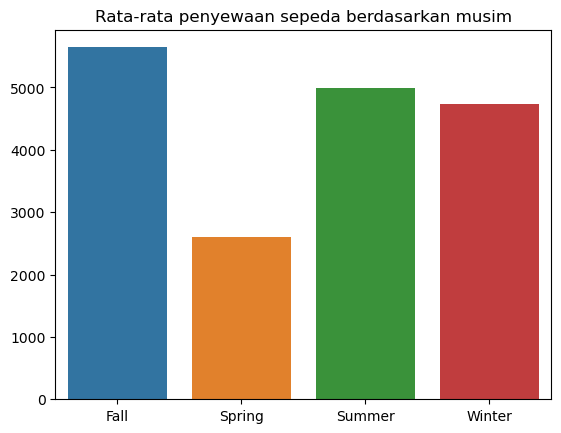

In [28]:
sns.barplot(
    y="cnt",  # Nilai di sumbu y
    x="season",
    data=seasonal
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Rata-rata penyewaan sepeda berdasarkan musim')
plt.show()

Berdasarkan visualisasi di atas, apa yang kita peroleh saat exploratory semakin jelas terlihat. Penyewa sepeda memiliki rata-rata jumlah tertinggi saat musim gugur, yang diikuti oleh musim panas dan musim dingin dengan perbedaan yang tidak terlalu signifikan. Rata-rata terkecil ada pada musim semi dengan rata-rata yang terpaut cukup jauh dibandingkan musim lainnya.

### Pertanyaan 2: Bagaimana perbandingan penyewa sepeda casual dan registered setiap harinya?

In [29]:
dday = day_df.groupby(by=["weekday"]).agg({
    "casual": "mean",
    "registered": "mean"
}).reset_index()

dday

,weekday,casual,registered
0,Friday,752.288462,3938.000000
1,Monday,674.133333,3663.990476
2,Saturday,1465.257143,3085.285714
3,Sunday,1338.295238,2890.533333
4,Thursday,590.961538,4076.298077
5,Tuesday,556.182692,3954.480769
6,Wednesday,551.144231,3997.394231


In [30]:
dday_melt = dday.melt('weekday', var_name='rent', value_name='mean')
dday_melt

,weekday,rent,mean
0,Friday,casual,752.288462
1,Monday,casual,674.133333
2,Saturday,casual,1465.257143
3,Sunday,casual,1338.295238
4,Thursday,casual,590.961538
5,Tuesday,casual,556.182692
6,Wednesday,casual,551.144231
7,Friday,registered,3938.000000
8,Monday,registered,3663.990476
9,Saturday,registered,3085.285714


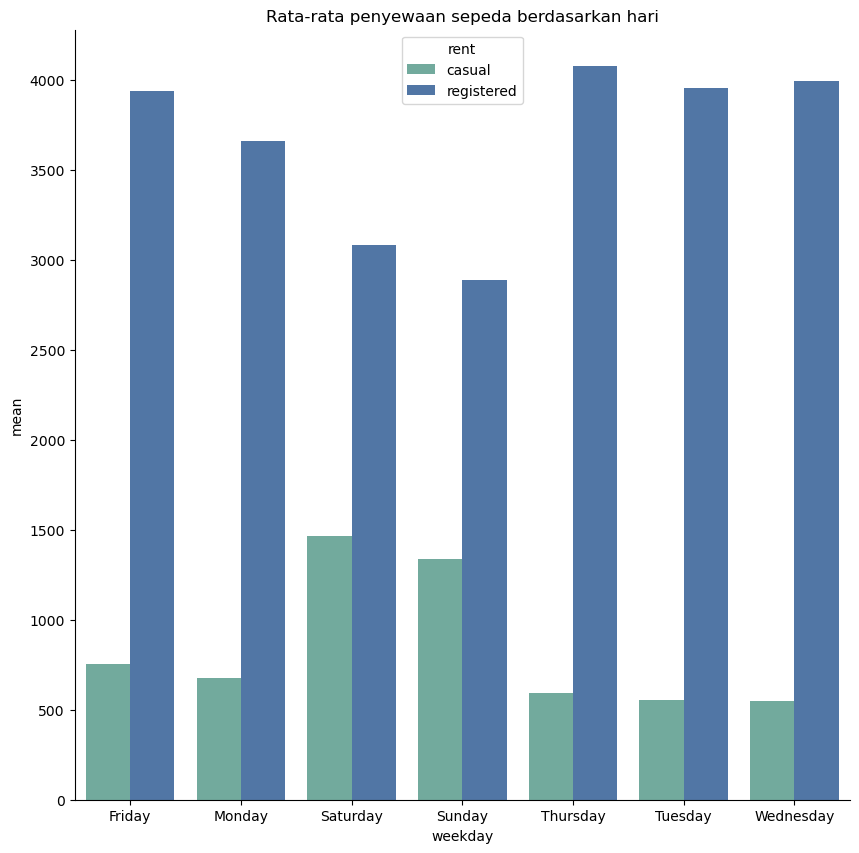

In [31]:
# Create an array with the colors you want to use
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

# Set the figure size
plt.figure(figsize=(10, 10))

# grouped barplot
ax = sns.barplot(
    x="weekday", 
    y="mean", 
    hue="rent", 
    data=dday_melt, 
    ci=None
    )

# Customize the axes and title
ax.set_title("Rata-rata penyewaan sepeda berdasarkan hari")
ax.set_ylabel("mean")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Melalui visualisasi tersebut, kita dapat melihat bahwa untuk setiap harinya, penyewa sepeda registered selalu lebih banyak dibandingkan casual. Pada saat weekend (Sabtu dan Minggu), rata-rata penyewa registered cenderung menurun, sementara penyewa casual justru semakin banyak dibandingkan saat weekday.

### Pertanyaan 3: Bagaimana tren penggunaan sepeda dalam sehari untuk tiap musim?

In [32]:
hour_fall = hour_df.loc[hour_df["season"]=="Fall"].groupby(by="hr").agg({
    "cnt":"mean",
})

hour_spring = hour_df.loc[hour_df["season"]=="Springer"].groupby(by="hr").agg({
    "cnt":"mean",
})

hour_winter = hour_df.loc[hour_df["season"]=="Winter"].groupby(by="hr").agg({
    "cnt":"mean",
})

hour_summer = hour_df.loc[hour_df["season"]=="Summer"].groupby(by="hr").agg({
    "cnt":"mean",
})


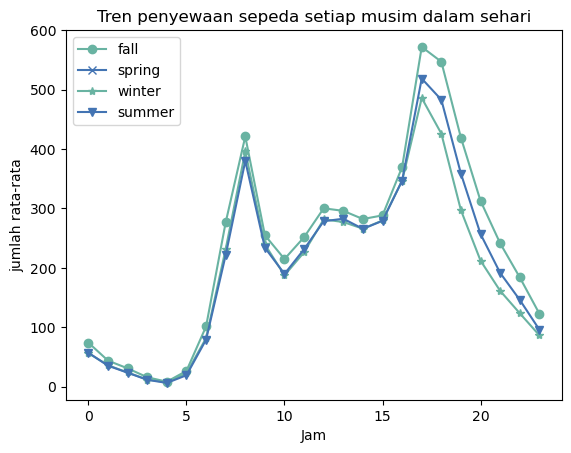

In [33]:
plt.plot(hour_fall["cnt"], label = "fall", marker = "o")
plt.plot(hour_spring["cnt"], label = "spring", marker = "x")
plt.plot(hour_winter["cnt"], label = "winter", marker = "*")
plt.plot(hour_summer["cnt"], label = "summer", marker = "v")
plt.title("Tren penyewaan sepeda setiap musim dalam sehari")
plt.xlabel("Jam")
plt.ylabel("jumlah rata-rata")
plt.legend(loc="upper left")
plt.show()

Berdasarkan grafik tersebut, terlihat bahwa penyewa sepeda dalam sehari untuk setiap musim memiliki tren yang serupa dimana penyewa paling sedikit adalah saat menuju tengah malam hingga pagi hari. Keseluruhan musim menunjukkan adanya 2 puncak penyewa sepeda paling tinggi dalam sehari, dengan puncak rata-rata tertinggi ada pada jam 17 kemudian diikuti pada jam 8. Bisa terlihat bahwa tidak adapersilangan yang terlihat antara setiap musim. Maka dari itu, kita bisa tahu bahwa tren penggunaan / penyewaan sepeda dalam sehari untuk setiap jam nya tidak dipengaruhi oleh musim.

## Conclusion

1. Berdasarkan visualisasi, penyewa sepeda memiliki rata-rata jumlah tertinggi saat musim gugur, yang diikuti oleh musim panas dan musim dingin dengan perbedaan yang tidak terlalu signifikan. Rata-rata jumlah penyewa terkecil justru terjadi pada musim semi dan bahkan dengan rata-rata yang terpaut cukup jauh dibandingkan musim lainnya.

2. Untuk setiap harinya, penyewa sepeda registered selalu lebih banyak dibandingkan casual. Ini berarti, jumlah orang yang menyewa sepeda untuk short term (beberapa jam, 1 hari, 3 hari) tidak pernah melebihi jumlah penyewa sepeda dengan membership (long term, misalnya 1 bulan). Ditemukan juga bahwa pada saat weekend (Sabtu dan Minggu), rata-rata penyewa registered cenderung menurun, sementara penyewa casual justru semakin banyak dibandingkan saat weekday. Ini berarti, para penyewa casual cenderung mulai menyewa sepeda / menggunakan sepeda disaat sedang weekend.

3. Penyewa sepeda dalam sehari untuk setiap musim memiliki tren yang serupa dimana penyewa paling sedikit adalah saat menuju tengah malam hingga pagi hari. Keseluruhan musim menunjukkan adanya 2 puncak penyewa sepeda paling tinggi dalam sehari, dengan puncak rata-rata tertinggi ada pada jam 17 kemudian diikuti pada jam 8. Hasil ini juga secara tidak langsung menunjukkan jam aktif / jam menggunakan sepeda sewaan dari orang-orang. Dari hasil ini juga kita bisa tahu bahwa tren penggunaan / penyewaan sepeda dalam sehari untuk setiap jam nya tidak dipengaruhi oleh musim.

## Analisis Lanjutan

dengan **clustering**, menentukan total penyewa berdasarkan cuaca

In [35]:
day_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

weathersit
1    451
2    243
3     21
Name: cnt, dtype: int64

+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
Apabila dilihat dari cuaca, terlihat bahwa penyewa sepeda, total penyewa cenderung lebih banyak ketika cuaca sedang clear/partly cloudy, terbalik dengan saat cuaca sedang light snow/rain, rata-rata penyewa sepeda menjadi jauh lebih sedikit dibanding cuaca lainnya.

dengan **clustering**, menentukan total penyewa berdasarkan holiday

In [36]:
day_df.groupby(by="holiday").cnt.nunique().sort_values(ascending=False)

holiday
0    679
1     20
Name: cnt, dtype: int64

terlihat bahwa penyewa sepeda terpaut jauh lebih banyak ketika bukan holiday